In [17]:
import tensorcircuit as tc
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import expm, sinm, cosm

give a degree theta
3


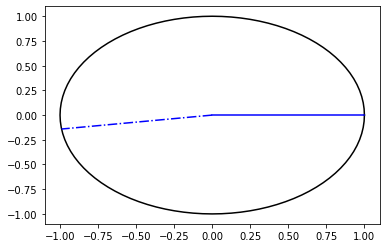

In [18]:
print('give a degree theta')
theta=float(input())
def R(x):
    return np.array([[np.cos(x),np.sin(x)],[-np.sin(x),np.cos(x)]])
def draw_circle(avg=""):
    x_arr,y_arr=[],[]
    for i in range(101):
        t=np.pi/50*i;
        x_arr.append(np.cos(t))
        y_arr.append(np.sin(t))
    plt.plot(x_arr,y_arr,avg)
def draw_line(x,y,avg=""):
    x_arr,y_arr=[0,x],[0,y]
    plt.plot(x_arr,y_arr,avg)

v=np.array([[1],[0]])
u=np.matmul(R(theta),v)

plt.clf()
draw_circle('k-')
draw_line(1,0,'b')
draw_line(u[0][0],u[1][0],'b-.')
plt.show()

In [19]:
print(expm(1.j*tc.gates._x_matrix))
print(expm(1.j*tc.gates._y_matrix))
print(expm(1.j*tc.gates._z_matrix))

[[0.54030231+0.j         0.        +0.84147098j]
 [0.        +0.84147098j 0.54030231+0.j        ]]
[[ 0.54030231+0.j  0.84147098+0.j]
 [-0.84147098+0.j  0.54030231+0.j]]
[[0.54030231+0.84147098j 0.        +0.j        ]
 [0.        +0.j         0.54030231-0.84147098j]]


In [20]:
def test(theta):
    print(np.allclose(expm(theta*1.j*tc.gates._x_matrix),np.cos(theta)*np.array([[1,0],[0,1]])+1.j*np.sin(theta)*tc.gates._x_matrix, atol=0.0001))

In [21]:
test(1)

True


注意到任意一个泡利矩阵 $\hat{P}$ 都有性质 $P^2=\bar{P}^T=I$ 。
对 $e^{i\theta\hat{P}}$ ，我们将它泰勒展开，只会有 $I,iP$ 两项，系数分别是 $\cos(\theta)$ 和$\sin(\theta)$ 的泰勒展开，得证。

若矩阵欧拉公式 $e^{i\theta P}=\cos(\theta)I+i\sin(\theta)P$ 对任意 $\theta$ 成立，我们取 $-\theta$ 可以得到$e^{-i\theta P}=\cos(\theta)I-i\sin(\theta)P$

故 $I=e^{i\theta P}\times e^{-i\theta P}=\cos^2(\theta)I^2-i^2\sin^2(\theta)P^2=\cos^2(\theta)I+\sin^2(\theta)P^2$

比较各元素可知 $P^2=I$ ，由上述证明易知这样的 $P$ 满足公式。

故 $P$ 满足该公式当且仅当 $P^2=I$ 

In [22]:
Pauli=[np.array([[1,0],[0,1]]),tc.gates._x_matrix,tc.gates._y_matrix,tc.gates._z_matrix]
def expectation(p,q,theta):
    P=Pauli[p]
    Q=Pauli[q]
    v=expm(1.j*theta/2*P)*np.matrix([1,0]).transpose()
    return (v.conj().transpose()@Q@v)[0,0]

In [23]:
expectation(2,3,3)

(-0.9899924966004452+0j)

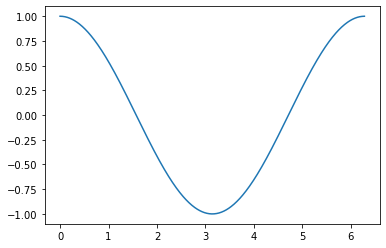

In [24]:
from matplotlib import pyplot as plt
plt.clf()
x = np.arange(0, 2 * np.pi, 0.01)
plt.plot(x, [expectation(1,3, t) for t in x])
plt.show()

In [25]:
n=int(input())
H = np.zeros((2**n, 2**n))
for i in range(n):
    H += np.kron(np.kron(np.identity(2**i),tc.gates._z_matrix),np.identity(2**(n-i-1)))
for i in range(n-1):
    H += np.kron(np.kron(np.identity(2**i),tc.gates._x_matrix),np.identity(2**(n-i-1)))*np.kron(np.kron(np.identity(2**(i+1)),tc.gates._x_matrix),np.identity(2**(n-i-2)))
print(H)
print(H[0,0])

4
[[ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2